In [58]:
import pandas as pd
import mysql.connector

from IPython.display import display, Markdown

db = mysql.connector.connect(
    host="localhost",
    user="root",
    password="secret",
    port="3306",
    database="serlo"
)


def read_event_log():
    df = pd.read_sql("""
        select event_log.id, event_log.date, event_log.actor_id,
        user.username, event_log.event_id, event.name
        from event_log
        join event on event.id = event_log.event_id
        join user on user.id = event_log.actor_id
        order by event_log.id
    """, db)
    df.set_index("id", inplace=True)
    return df

event_log = read_event_log()
event_log.head()

,date,actor_id,username,event_id,name
id,,,,,
1,2014-03-01 20:36:33,6,Legacy,1,taxonomy/term/associate
2,2014-03-01 20:36:34,6,Legacy,1,taxonomy/term/associate
3,2014-03-01 20:36:34,6,Legacy,1,taxonomy/term/associate
4,2014-03-01 20:36:34,6,Legacy,1,taxonomy/term/associate
5,2014-03-01 20:36:34,6,Legacy,1,taxonomy/term/associate


,becomes_active_90days,becomes_active_2days
date,,
2014-03-01 20:36:33,1.0,1.000000
2014-03-01 22:23:54,1.0,0.500000
2014-03-01 22:44:29,1.0,0.333333
2014-03-03 09:37:10,1.0,0.500000
2014-03-03 10:26:39,1.0,0.600000


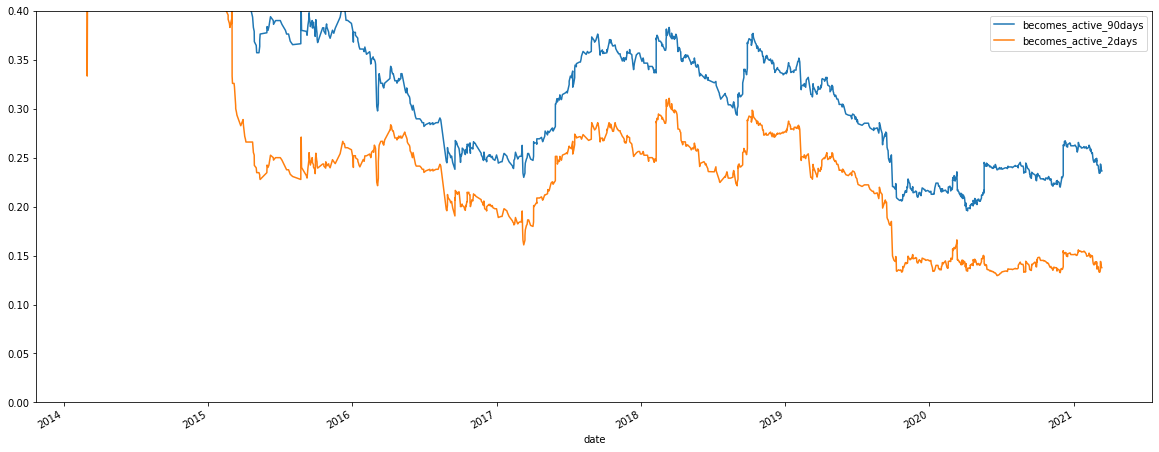

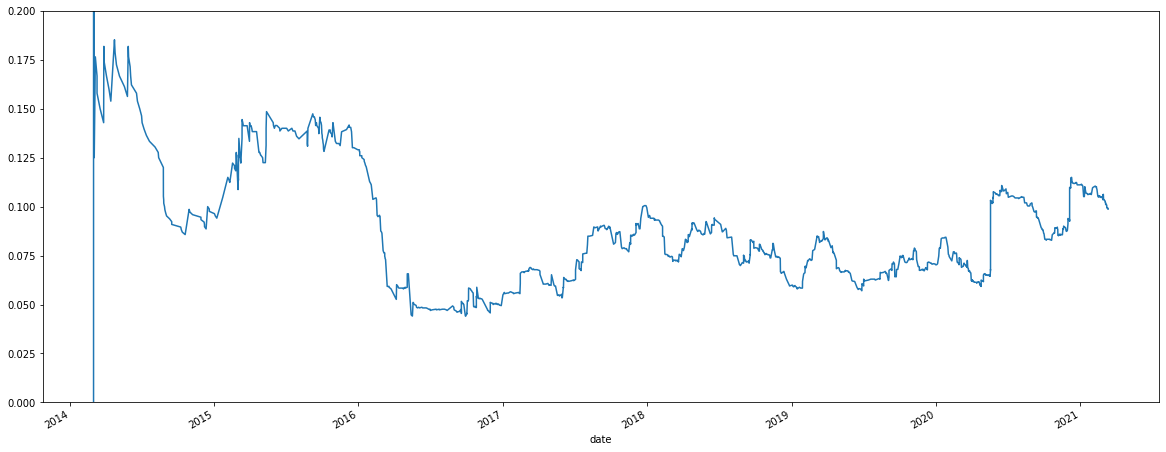

In [132]:
from IPython.display import display

import matplotlib.pyplot as plt

def becomes_active(x, delta):
    diff = x-x.min()
    if diff[diff < delta].count() > 10:
        return 1
    else:
        return 0

d = event_log.groupby("actor_id").aggregate({
    "date":  ["first", lambda x: becomes_active(x, pd.Timedelta("90days")), lambda x: becomes_active(x, pd.Timedelta("3days"))],
    "username": "first",
})
d.columns = d.columns.to_flat_index()
d.rename(columns={
    ("date", "first"): "date",
    ("date", "<lambda_0>"): "becomes_active_90days",
    ("date", "<lambda_1>"): "becomes_active_2days"
}, inplace=True)
d.sort_values("date", inplace=True)
d = d[["date", "becomes_active_90days", "becomes_active_2days"]]
d.set_index("date", inplace=True)
d = d.rolling("365d").mean()
display(d.head())
d.plot(figsize=(20,8), ylim=(0,0.4))
plt.show()
d["diff"] = d["becomes_active_90days"] - d["becomes_active_2days"]
d["diff"].plot(figsize=(20,8), ylim=(0,0.2))
plt.show()

,becomes_active_90days,becomes_active_2days
date,,
2014-03-01 20:36:33,1.0,1.0
2014-03-01 22:23:54,2.0,1.0
2014-03-01 22:44:29,3.0,1.0
2014-03-03 09:37:10,4.0,2.0
2014-03-03 10:26:39,5.0,3.0


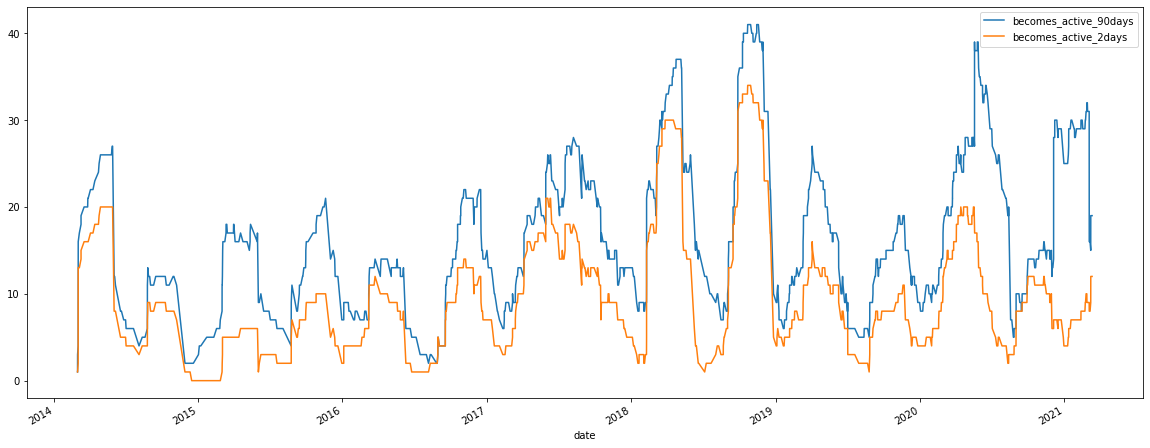

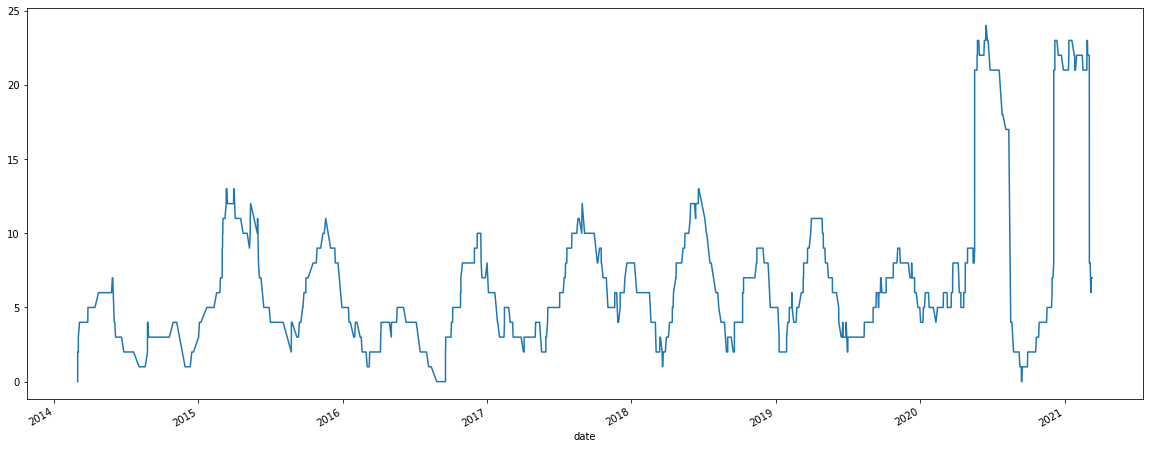

In [137]:
from IPython.display import display

import matplotlib.pyplot as plt

def becomes_active(x, delta):
    diff = x-x.min()
    if diff[diff < delta].count() > 10:
        return 1
    else:
        return 0

d = event_log.groupby("actor_id").aggregate({
    "date":  ["first", lambda x: becomes_active(x, pd.Timedelta("90days")), lambda x: becomes_active(x, pd.Timedelta("1days"))],
    "username": "first",
})
d.columns = d.columns.to_flat_index()
d.rename(columns={
    ("date", "first"): "date",
    ("date", "<lambda_0>"): "becomes_active_90days",
    ("date", "<lambda_1>"): "becomes_active_2days"
}, inplace=True)
d.sort_values("date", inplace=True)
d = d[["date", "becomes_active_90days", "becomes_active_2days"]]
d.set_index("date", inplace=True)
d = d.rolling("90d").sum()
display(d.head())
d.plot(figsize=(20,8))
plt.show()
d["diff"] = d["becomes_active_90days"] - d["becomes_active_2days"]
d["diff"].plot(figsize=(20,8))
plt.show()

In [49]:
pd.set_option('display.max_rows', None)
df = event_log[event_log["event_id"] == 5].groupby("actor_id").aggregate({
    "username": "first",
    "event_id": "count"
})
df.rename(columns = { "event_id": "edits" }, inplace=True)
df.sort_values("edits", inplace=True, ascending=False)
df = df.head(136)
df.to_csv("/tmp/most_active_user.csv")
df

,username,edits
actor_id,,
73435,kathongi,5207
146133,WandaPaetzold,3337
87602,Karin,3187
53589,chdieter,2776
70932,metzgaria,2184
27693,Nish,2052
121732,Jonathan,1899
163773,LinaMaria,1841
266,Renate,1622


In [39]:
def read_event_log_all():
    df = pd.read_sql("""
        select event_log.id, event.name, event_log.actor_id, user.username,
        event_log.date, event_log.event_id, event_parameter_uuid.uuid_id
        from event_log
        join event on event.id = event_log.event_id
        join user on user.id = event_log.actor_id
        join event_parameter on event_parameter.log_id = event_log.id
        join event_parameter_uuid on event_parameter_uuid.event_parameter_id = event_parameter.id
        where event_parameter.name_id != 8
    """, db)
    df.set_index("id", inplace=True)
    return df

read_event_log_all().to_csv("/tmp/event_log.csv")

In [53]:
df2 = event_log[event_log["event_id"] == 5].copy()
df2["year"] = df2["date"].map(lambda x: x.year)
df2 = df2[df2["year"] <= 2019].groupby("actor_id").aggregate({
    "username": "first",
    "event_id": "count"
    })
df2.rename(columns = { "event_id": "edits" }, inplace=True)
df2.sort_values("edits", inplace=True, ascending=False)
df2 = df2.head(136)

df2[~df2["username"].isin(df["username"])].to_csv("/tmp/2019.csv")

,edits
count,100.00000
mean,8.00000
std,17.02464
min,0.00000
25%,0.00000
50%,0.00000
75%,10.00000
max,126.00000


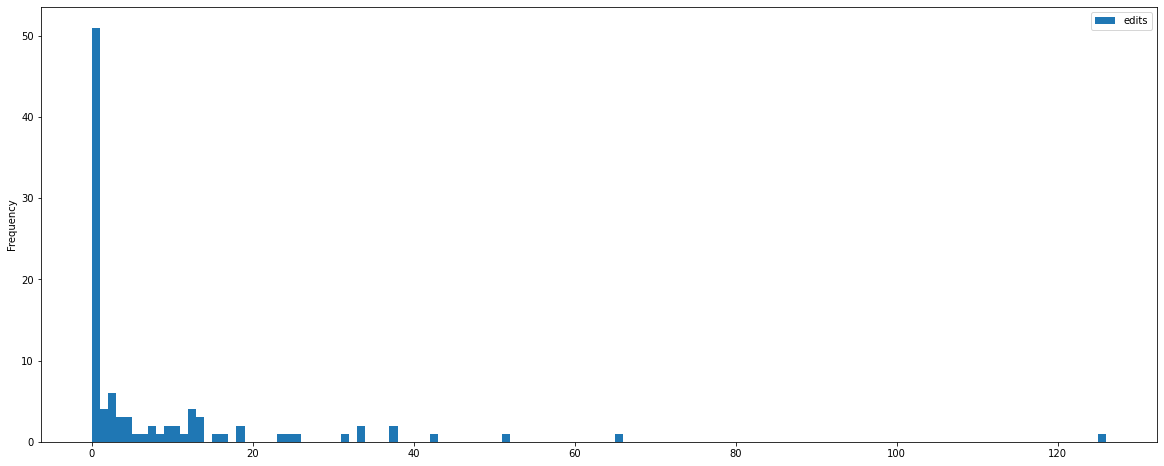

In [221]:
p = event_log.copy()
p = p[(p["username"] != "Legacy") & (p["event_id"] == 5) & (p["username"] == "kathongi")].copy()
p.set_index("date", inplace=True)
p = p.resample("1d").aggregate({"actor_id": "count" })
p.rename(columns={"actor_id": "edits"}, inplace=True)
f = p.tail(100)
#display(f[f["edits"] <10])
m = int(f.max())
f.plot.hist(bins=m, figsize=(20,8))
f.describe()
